In [9]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import fourier_filter

device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [10]:
x = np.linspace(-10, 10, 128)
X, Y = np.meshgrid(x, x)
R = np.sqrt(np.square(X) + np.square(Y))
sigma = 0.5
x0 = np.exp(-np.square(R/sigma))

xfi_np, xf_np = fourier_filter.numpy_fourier_lowpass_filter(x0, 0.3)
xfi_tr, xf_tr = fourier_filter.torch_fourier_lowpass_filter(x0, 0.3)

Text(0.5, 1.0, '$|x_1|$ (PyTorch - Numpy)')

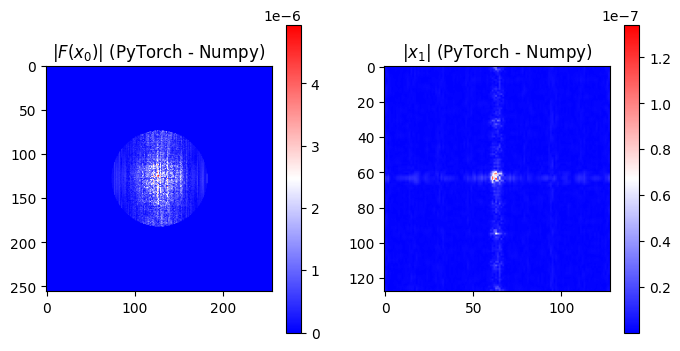

In [11]:
fig, axs = plt.subplots(1, 2, figsize=(8,4))
pl0 = axs[0].imshow(np.abs(xf_tr - xf_np), cmap='bwr')
pl1 = axs[1].imshow(np.abs(xfi_tr - xfi_np), cmap='bwr')
plt.colorbar(pl0)
plt.colorbar(pl1)

axs[0].set_title(r'$|F(x_0)|$ (PyTorch - Numpy)')
axs[1].set_title(r'$|x_1|$ (PyTorch - Numpy)')
